In [2]:
#アヤメ科の分類
##下準備
!pip install japanize-matplotlib
from sklearn import datasets
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
##データ収集
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=["がく片の長さ","がく片の幅","花びらの長さ","花びらの幅"])
iris_target = pd.DataFrame(iris.target, columns=["花の種類"])
iris_all = pd.concat([iris_data, iris_target], axis=1)

Text(0.5, 1.0, 'test')

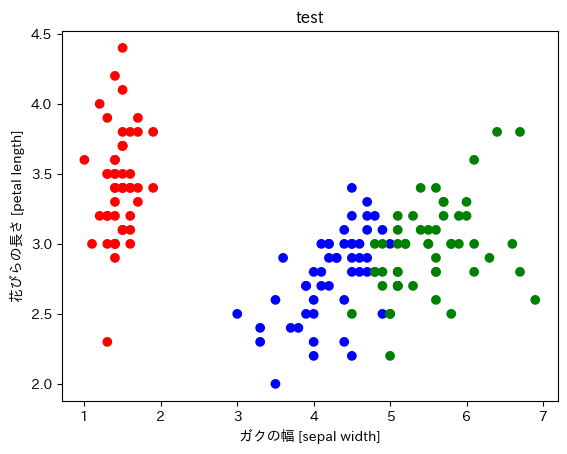

In [4]:
##前処理
d0 = 0
d1 = 1
d2 = 2
d3 = 3
X = iris.data[:,:]
y = iris.target
X0 = X[:, 0].ravel().tolist()
X1 = X[:, : 1].ravel().tolist()
X2 = X[:, 1: 2].ravel().tolist()
X3 = X[:, 2: 3].ravel().tolist()
y_class = []

for x in y:
  if x == 0:
    y_class.append("red")
  if x == 1:
    y_class.append("blue")
  if x == 2:
    y_class.append("green")
plt.scatter(X3, X2, color = y_class)
plt.xlabel('ガクの幅 [sepal width]')
plt.ylabel('花びらの長さ [petal length]')
plt.title("test")

##学習

In [5]:
X_std = scale(X)
test_proportion = 0.3
neighbors = 3
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion, random_state = 1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##結果の可視化

In [6]:
acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test = accuracy_score(y_test, knn.predict(X_test))
print('クラスタ数={},特徴選択=d0:d3'.format(neighbors))
print('train dataの正解率：{:.1f}%'.format(acc_train*100))
print('test dataの正解率：{:.1f}%'.format(acc_test*100))

クラスタ数=3,特徴選択=d0:d3
train dataの正解率：96.2%
test dataの正解率：97.8%


In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [ ]:
def plot_decision_boundary():
    # X_trainの0番目の特徴量の最小値-0,5,最大値+0.5した値を取得
    x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    # X_trainの1番目の特徴量の最小値-0,5,最大値+0.5した値を取得
    x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    x3_min, x3_max = X_train[:, 2].min() - 0.5, X_train[:, 2].max() + 0.5
    x4_min, x4_max = X_train[:, 3].min() - 0.5, X_train[:, 3].max() + 0.5
    #特徴量１，２を最小～最大の間で0.02刻みのデータ点を生成し、meshgridでグリッドデータを生成
    xx1, xx2,xx3,xx4 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02),np.arange(x3_min, x3_max, 0.02),
                           np.arange(x4_min, x4_max, 0.02))

    """k近傍法の予測結果を取得
       ravel()で1次元に変換。(328, 269)→ (2,88232)
       predict(予測データ)
      .Tで(2, 88232)　→(88232, 2)に変換(入力データ X_train同じ形状(105,2)へ変換している)
      つまり、0.02刻みで発生させた特徴量データ点xx1,xx2を入力にしてpredictさせた結果をZに格納している。
    """
    Z = knn.predict(np.array([xx1.ravel(), xx2.ravel(),xx3.ravel(), xx4.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #マーカー種類の定義
    markers = ('^', 'x', 'o', 's', 'v')
    #色の設定
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    #colorsリストから、出力ｙの種類の数分、色の情報を持ったオブジェクトを生成する。
    cmap = ListedColormap(colors[:len(np.unique(y))])


    #プロット図のサイズを指定
    plt.figure(figsize=(7, 7))
    #図の間隔を調整
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    # plt.subplot(行数, 列数, 何番目のプロットか)を指定
    plt.subplot(2,1,1)

    # meshgrid で作った xx1 と xx2、そして高さに相当する予測結果Z を contour に渡す
    # contourf(X軸の配列、Y軸の配列、高さZ)の形式が基本系
    # こうすると、Z（予測結果）の種類毎にcmapの色でプロットされる。
    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    # x軸の範囲を特徴量1の最小～最大に指定
    plt.xlim(xx1.min(), xx1.max())
    # y軸の範囲を特徴量2の最小～最大に指定
    plt.ylim(xx2.min(), xx2.max())


    """plt.scatter(X,Y)で散布図を描画
       clは今回は０，１，２のラベル
       X_train[y_train == cl, 0]
         → y_trainが特定のラベルの行の0列目のX_trainデータだけを抽出している。
        y_train = 1などとすると以下のようにTrue,Falseのアレイ要素が返ってくるので
        そのTrue,False配列をX_trainのｘ軸のスライスに指定すると、該当ラベルだけの行のX_trainを取得できる。
        array([ True, False, False, False, False, False,  True,  True,  True,
              False,  True,  True,  True)]
    """
    #凡例ラベルの格納リスト
    legend =[]
    for index, color in enumerate(np.unique(y_train)):
        p = plt.scatter(x=X_train[y_train == color, 0], y=X_train[y_train == color, 1],
                    alpha=0.8, c=cmap(index),marker=markers[index], label=color, edgecolors='black')
        legend.append(p)

    #凡例（正解ラベル情報）の表示
    plt.legend(legend,iris.target_names)
    plt.xlabel('ガクの長さ [sepal length]')
    plt.ylabel('ガクの幅 [sepal width]')
    plt.title('train_data(訓練データ)')

    plt.subplot(2,1,2)
    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #凡例ラベルの格納リスト
    legend =[]
    for index, color in enumerate(np.unique(y_test)):
        p= plt.scatter(x=X_test[y_test == color, 0], y=X_test[y_test == color, 1],
                        alpha=0.8, c=cmap(index),marker=markers[index], label=color, edgecolors='black')
        legend.append(p)

    #凡例（正解ラベル情報）の表示
    plt.legend(legend,iris.target_names)
    plt.xlabel('ガクの長さ [sepal length]')
    plt.ylabel('ガクの幅 [sepal width]')
    plt.title('test_data(検証データ)')
    plt.show()

plot_decision_boundary()